In [36]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [14]:
# load in data 

covid = pd.read_csv('./covid.csv', index_col = 0)
covid.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,...,underlying_conditions_yn,Race_Categorical,Sex_Female,Sex_Male,Sex_Missing,Ethn_Hispanic/Latino,Ethn_NonHispanic/Latino,Ethn_Unknown,Age_Categorical,Adj_Case_Month
146,2021-01,NC,37.0,MONTGOMERY,37123.0,18 to 49 years,Male,White,Hispanic/Latino,Missing,...,Yes,White,0,1,0,1,0,0,18 to 49 years,10
200,2020-05,NC,37.0,SAMPSON,37163.0,0 - 17 years,Female,White,Hispanic/Latino,Missing,...,Yes,White,1,0,0,1,0,0,0 - 17 years,2
487,2020-06,NC,37.0,WILSON,37195.0,50 to 64 years,Female,White,Hispanic/Latino,Missing,...,Yes,White,1,0,0,1,0,0,50 to 64 years,3
871,2020-08,NC,37.0,HENDERSON,37089.0,18 to 49 years,Male,White,Hispanic/Latino,Missing,...,Yes,White,0,1,0,1,0,0,18 to 49 years,5
1100,2020-07,NC,37.0,BRUNSWICK,37019.0,18 to 49 years,Male,White,Hispanic/Latino,Missing,...,Yes,White,0,1,0,1,0,0,18 to 49 years,4


In [3]:
# overview of variables 

from pandas_profiling import ProfileReport
ProfileReport(covid)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
covid.underlying_conditions_yn.value_counts()
# only has 'yes' for underlying conditions, choosing to exclude for now

# most of 'icu_yn' is unknown, don't know if useful to include 

# not going to include res county in features because the encoding seems pretty extensive -- will revisit

Yes    110913
Name: underlying_conditions_yn, dtype: int64

In [16]:
# checked the value counts of certain variables but realized I could use pandas profiling instead
covid['death_yn'].value_counts()


No     109090
Yes      1823
Name: death_yn, dtype: int64

In [17]:
# encode categorical variables 


# covid["Age_Cat"] = covid["Age_Categorical"].cat.codes

covid = pd.get_dummies(covid, columns=["Age_Categorical"])
covid = pd.get_dummies(covid, columns=["symptom_status"])
covid = pd.get_dummies(covid, columns=["current_status"])
covid = pd.get_dummies(covid, columns=["hosp_yn"])
covid = pd.get_dummies(covid, columns=["Race_Categorical"])

In [18]:
# view column names 
covid.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity', 'process',
       'exposure_yn', 'icu_yn', 'death_yn', 'underlying_conditions_yn',
       'Sex_Female', 'Sex_Male', 'Sex_Missing', 'Ethn_Hispanic/Latino',
       'Ethn_NonHispanic/Latino', 'Ethn_Unknown', 'Adj_Case_Month',
       'Age_Categorical_0 - 17 years', 'Age_Categorical_18 to 49 years',
       'Age_Categorical_50 to 64 years', 'Age_Categorical_65+ years',
       'symptom_status_Asymptomatic', 'symptom_status_Symptomatic',
       'symptom_status_Unknown', 'current_status_Laboratory-confirmed case',
       'current_status_Probable Case', 'hosp_yn_No', 'hosp_yn_Unknown',
       'hosp_yn_Yes', 'Race_Categorical_American Indian/Alaska Native',
       'Race_Categorical_Asian', 'Race_Categorical_Black',
       'Race_Categorical_Multiple/Other',
       'Race_Categorical_Native Hawaiian/Other Pacific Islander',
       'Race_Categorical_Unknown', 'Race_Ca

### Included Features:
   - Age
   - Symptom Status
   - Case Month
   - Sex
   - Ethnicity
   - current status
   - hospitalized

In [43]:
# set features and response variable 

features1 = ['Age_Categorical_0 - 17 years', 'Age_Categorical_18 to 49 years',
             'Age_Categorical_50 to 64 years', 'Age_Categorical_65+ years', 'symptom_status_Asymptomatic',
             'symptom_status_Symptomatic', 'symptom_status_Unknown', 'Adj_Case_Month', 
             'Sex_Female', 'Sex_Male', 'Sex_Missing', 'Ethn_Hispanic/Latino',
             'Ethn_NonHispanic/Latino', 'Ethn_Unknown',
             'current_status_Laboratory-confirmed case', 'current_status_Probable Case',
             'hosp_yn_No', 'hosp_yn_Unknown',
             'hosp_yn_Yes']
covid = covid.replace({'death_yn': {'Yes': 1, 
                                'No': 0}})

X = covid[features1]
y = covid.death_yn

# Logistic Regression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

logreg1 = LogisticRegression(solver= 'liblinear', random_state = 123)

In [21]:
logreg1.fit(X_train, y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [22]:
y_pred = logreg1.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

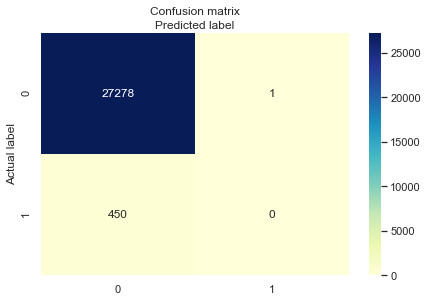

In [38]:
# confusion matrix for logistic regression 

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

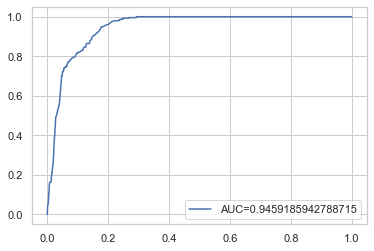

In [41]:
# roc curve for logistic regression

y_pred_proba = logreg1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [23]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.983735439431642
Precision: 0.0
Recall: 0.0


In [25]:
from sklearn.metrics import classification_report 

print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     27279
           1       0.00      0.00      0.00       450

    accuracy                           0.98     27729
   macro avg       0.49      0.50      0.50     27729
weighted avg       0.97      0.98      0.98     27729



# Random Forest Classification

In [26]:
# random forest attempt

from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred_rf = rforest.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.98398788272206


In [28]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     27279
           1       0.58      0.05      0.09       450

    accuracy                           0.98     27729
   macro avg       0.78      0.52      0.54     27729
weighted avg       0.98      0.98      0.98     27729



In [31]:
feature_imp = pd.Series(rforest.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Adj_Case_Month                              3.278808e-01
hosp_yn_Yes                                 1.665306e-01
Age_Categorical_65+ years                   1.629961e-01
hosp_yn_No                                  1.136968e-01
Age_Categorical_50 to 64 years              4.363118e-02
Age_Categorical_18 to 49 years              3.095416e-02
Ethn_NonHispanic/Latino                     3.031255e-02
symptom_status_Unknown                      2.521602e-02
Ethn_Unknown                                2.056745e-02
hosp_yn_Unknown                             1.881595e-02
symptom_status_Symptomatic                  1.215231e-02
symptom_status_Asymptomatic                 9.942385e-03
Sex_Female                                  9.230821e-03
Sex_Male                                    8.342104e-03
current_status_Laboratory-confirmed case    7.156872e-03
current_status_Probable Case                6.207726e-03
Ethn_Hispanic/Latino                        4.770748e-03
Age_Categorical_0 - 17 years   

No handles with labels found to put in legend.


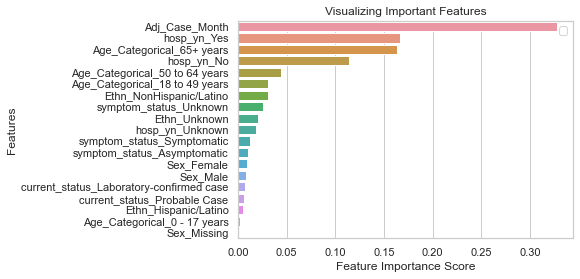

In [34]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Remove least important features to potentially improve accuracy ? 